In [2]:
import pandas as pd # importa a biblioteca pandas para importar o arquivo csv

In [3]:
df = pd.read_csv('D:/SENAI/2024-2/IABD/Intelig-ncia-Artificial-e-Big-Data--2-2024/Bases de dados/Social_Network_Ads.csv',sep=',')

In [4]:
df.head() # exibe as primeiras linhas do dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Tratamento dos dados renomeando as colunas


In [5]:
colunas = {"User ID":"Usuario",
               "Gender":"Genero","Age":"Idade","EstimatedSalary":"Salario Estimado","Purchased":"Comprou"}

In [6]:
df.rename(columns=colunas,inplace=True) # renomeia as colunas

In [7]:
df.head()

,Usuario,Genero,Idade,Salario Estimado,Comprou
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Importa as bibliotecas para implementar o algoritmo SVM

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler # biblioteca para realizar a normalização dos dados
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap # biblioteca para alterar cor dos gráficos

Divide os dados em x e y
onde x é a entrada e
y é a saída

In [9]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

Divisão dos dados em treino e teste

In [10]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3,
                                                        random_state = 3)

Tratamento dos dados, realizando sua normalização


In [11]:
# Padronização dos dados:
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

# Treinando o classificador sobre o conjunto de teste:
algoritmo = SVC(kernel = 'linear', random_state = 3)
algoritmo.fit(X_treino, y_treino)

SVC(kernel='linear', random_state=3)

Previsão dos resultados

In [12]:
# Previsão dos resultados
y_prev = algoritmo.predict(X_teste)

# Gerando a Matriz de Confusão

In [13]:
cm = confusion_matrix(y_teste, y_prev)
print(cm)

[[73  5]
 [16 26]]


In [18]:
import seaborn as sns # importa a biblioteca se seaborn para plotar a matriz de confusão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Usuario           400 non-null    int64 
 1   Genero            400 non-null    object
 2   Idade             400 non-null    int64 
 3   Salario Estimado  400 non-null    int64 
 4   Comprou           400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


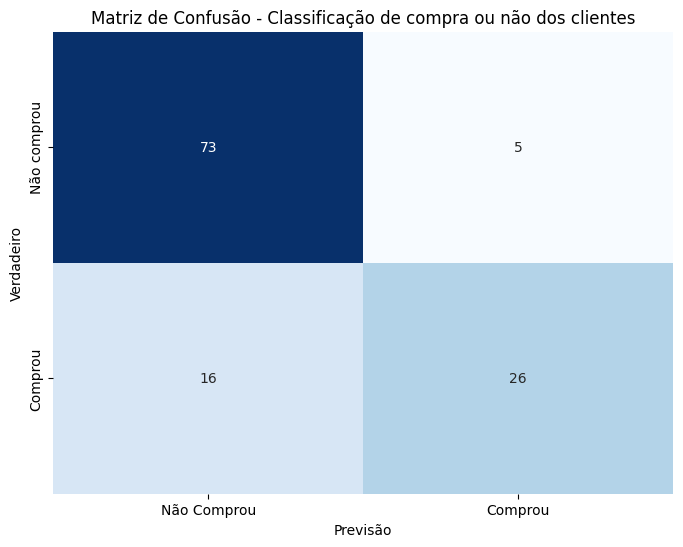

In [19]:
plt.figure(figsize=(8, 6))
print(df.info())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Não Comprou', 'Comprou'], yticklabels=['Não comprou', 'Comprou'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de compra ou não dos clientes')
plt.show()

Exibindo os resultados

C:\Users\Eng. Daniel Vieira\AppData\Local\Temp\ipykernel_22464\2596025790.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


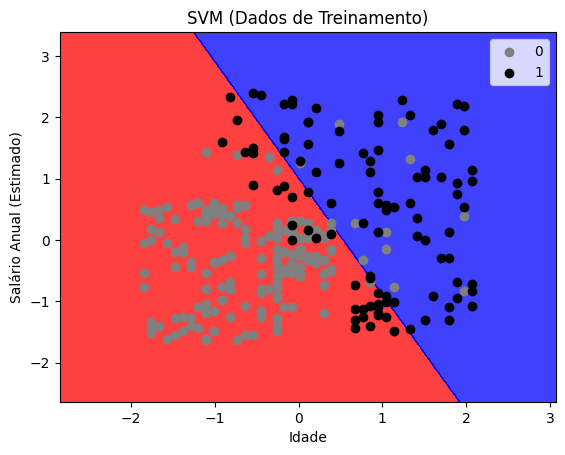

In [15]:
_X, _y = X_treino, y_treino
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('gray', 'black'))(i), label = j)
plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()


Visualizando os dados de teste

C:\Users\Eng. Daniel Vieira\AppData\Local\Temp\ipykernel_22464\785051974.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_X[_y == j, 0], _X[_y == j, 1],


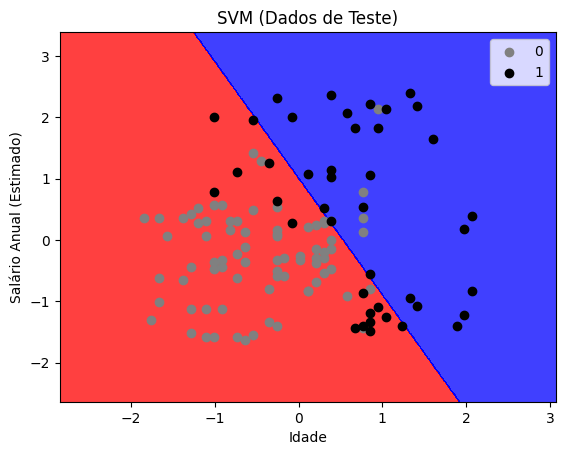

In [16]:
# Visualizando os resultados dos dados de teste:
_X, _y = X_teste,y_teste
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0], _X[_y == j, 1],
                c = ListedColormap(('grey', 'black'))(i), label = j)
plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()

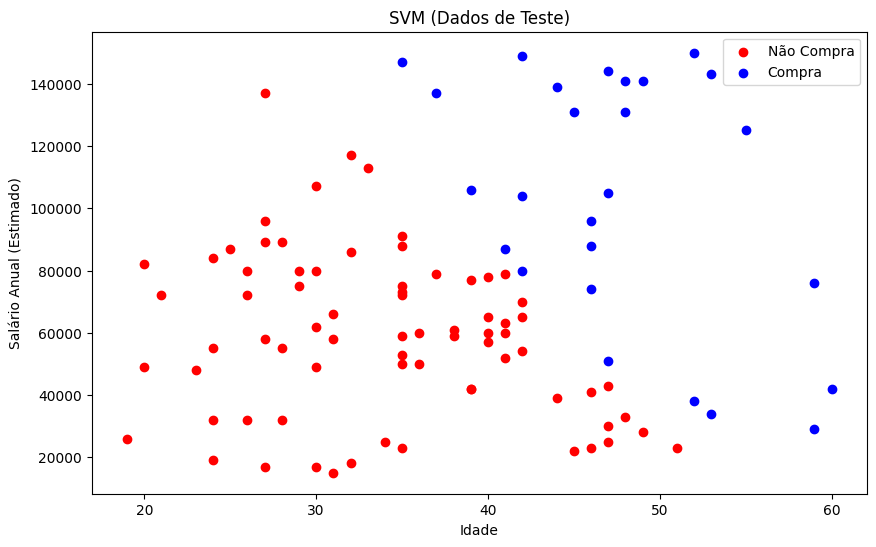

In [17]:
#Aplicando transformação nos dados
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

# Divisão da amostra
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=3)

# Padronização dos dados
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

# Treinamento do modelo SVM
algoritmo = SVC(kernel='linear', random_state=3)
algoritmo.fit(X_treino, y_treino)

# Previsão dos resultados
y_prev = algoritmo.predict(X_teste)

# Inversão da escala para os dados de teste
X_teste_inverse = sc.inverse_transform(X_teste)

# Visualização dos resultados dos dados de teste
plt.figure(figsize=(10, 6))

# Pontos para as duas classes
plt.scatter(X_teste_inverse[y_prev == 0, 0], X_teste_inverse[y_prev == 0, 1], c='red', label='Não Compra')
plt.scatter(X_teste_inverse[y_prev == 1, 0], X_teste_inverse[y_prev == 1, 1], c='blue', label='Compra')

plt.title('SVM (Dados de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()
